In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
import matplotlib.cm as cm

from matplotlib import pyplot as plt
from os import path
from scipy.stats import binom
from utils import *

In [2]:
# loading data from for plotting

pathToData = "../data/2017_11_03_miseq_barSeq1/"
logratios_df = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')

# smaller_df
small_log_df = pd.DataFrame()
small_log_df["locusId"] = logratios_df["locusId"]
small_log_df["sysName"] = logratios_df["sysName"]
small_log_df["desc"] = logratios_df["desc"]
small_log_df["HighCO2Log"] = logratios_df["setAS2 HCO"]
small_log_df["LowCO2Log"] = logratios_df["setAS3 LCO"]

pathToData = "../data/2017_11_03_miseq_barSeq2/"
logratios_df = pd.read_csv(path.join(pathToData, 'fit_logratios.tab'), sep='\t')

# smaller_df
small_log_df2 = pd.DataFrame()
small_log_df2["locusId"] = logratios_df["locusId"]
small_log_df2["sysName"] = logratios_df["sysName"]
small_log_df2["desc"] = logratios_df["desc"]
small_log_df2["HighCO2Log"] = logratios_df["setAS2 HCO"]
small_log_df2["LowCO2Log"] = logratios_df["setAS3 LCO"]

merge_on = ['locusId','sysName','desc']

small_log_df = small_log_df.merge(small_log_df2, on = merge_on, how = 'outer', suffixes=('_1','_2'))

# Absolute difference of 1.0 in the log fitness indicates twofold difference in linear scale 
# since we are using log base2 here. 
diff1 = small_log_df.LowCO2Log_1 - small_log_df.HighCO2Log_1
diff2 = small_log_df.LowCO2Log_2 - small_log_df.HighCO2Log_2

small_log_df['hcr'] = (diff1 <= -1.0) & (diff2 <= -1.0)

big_diff_mask =  (np.abs(diff1) >= 1.0) & (np.abs(diff2) >= 1.0)
small_diff_mask = np.logical_not(big_diff_mask)
big_diff_df = small_log_df[big_diff_mask]
small_diff_df = small_log_df[small_diff_mask]

small_log_df.to_csv('fig2/Fig2S1.csv')

big_diff_df

,locusId,sysName,desc,HighCO2Log_1,LowCO2Log_1,HighCO2Log_2,LowCO2Log_2,hcr
189,HNEAP_RS01030,HNEAP_RS01030,DUF2309 domain-containing protein,-0.009401,-2.953393,-0.026934,-2.713515,True
190,HNEAP_RS01035,HNEAP_RS01035,NADH dehydrogenase subunit 5,0.052684,-3.018988,-0.088164,-2.763632,True
191,HNEAP_RS01040,HNEAP_RS01040,LysR family transcriptional regulator,0.104180,-2.532413,-0.066607,-2.515328,True
636,HNEAP_RS04585,HNEAP_RS04585,DUF2309 domain-containing protein,-0.432006,-1.521512,-0.441381,-1.597535,True
638,HNEAP_RS04595,HNEAP_RS04595,oxidoreductase,-0.300871,-1.602699,-0.301030,-1.668806,True
642,HNEAP_RS04615,HNEAP_RS04615,hypothetical protein,-0.350162,-4.689306,-0.599468,-3.395316,True
643,HNEAP_RS04620,HNEAP_RS04620,major carboxysome shell protein 1B,-0.418130,-1.635895,0.043933,-1.366680,True
644,HNEAP_RS04625,HNEAP_RS04625,major carboxysome shell protein 1A,0.118381,-4.740660,0.064914,-4.307387,True
645,HNEAP_RS04630,HNEAP_RS04630,major carboxysome shell protein 1C,-0.148564,-6.831912,-0.080212,-6.469368,True
646,HNEAP_RS04635,HNEAP_RS04635,carboxysome peptide B,0.008628,-5.841639,0.124864,-6.077559,True


In [3]:
essentiality_colors = {
    'essential': qual_palette[9],
    'nonessential': qual_palette[3],
    'ambiguous': qual_palette[7], 
    'hcr': qual_palette[8]}

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


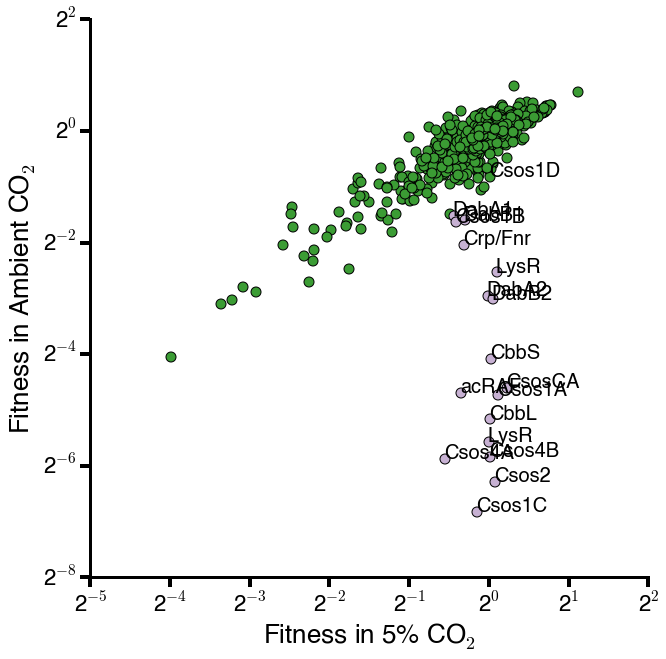

In [4]:
iCol = essentiality_colors['nonessential']
aCol = essentiality_colors['hcr']

fig,ax = plt.subplots(figsize=(10,10), frameon=False)

labeled_stuff = [
    ('HNEAP_RS04625', 'Csos1A', 0.11,-4.5),
    ('HNEAP_RS04620', 'Csos1B', -0.1,-1.6),
    ('HNEAP_RS04630', 'Csos1C', 0,-7),
    ('HNEAP_RS04635', 'Csos4B', 0.1,-5.9),
    ('HNEAP_RS04640', 'Csos4A', -1.5,-6.5),
    ('HNEAP_RS04650', 'Csos2', 0.1,-6.4),
    ('HNEAP_RS04660', 'CbbL', -0.9,-5.2),
    ('HNEAP_RS04655', 'CbbS', 0,-4.1),
    ('HNEAP_RS04645', 'CsosCA', 0.15,-5),
    ('HNEAP_RS04565','Csos1D', -0.05,-1.15),
    ('HNEAP_RS01030','DabA2', 0.1,-3.3),
        ('HNEAP_RS01035','DabB2',1,1),
    ('HNEAP_RS01040','LysR', 0.15,-2.6),
    ('HNEAP_RS04615','acRAF', -1.5,-4), #Pterin-4a-carbinolamine dehydratase
    ('HNEAP_RS05490','LysR', -0.8,-6),
    ('HNEAP_RS07320','Crp/Fnr', 0,-2.1),
    ('HNEAP_RS04585','DabA1', -1.5,-2.1),
        ('HNEAP_RS04595','DabB1',1,1),
#         ('HNEAP_RS05865','TPR_16',1,1),#Tetratricopeptide TPR_2 repeat protein
#     'HNEAP_RS05380':'Lytic transglycosylase catalytic',
#     'HNEAP_RS08465':'N-acetylmuramyl-L-alanine amidase, negative regulator of AmpC, AmpD'
]

for gene,label,x,y in labeled_stuff:
    row = small_log_df[small_log_df.locusId == gene]
    plt.text(row.HighCO2Log_1,row.LowCO2Log_1,label,fontsize=20)

plt.scatter(small_diff_df.HighCO2Log_1, small_diff_df.LowCO2Log_1, c=iCol, edgecolors='k', s=100)
plt.scatter(big_diff_df.HighCO2Log_1, big_diff_df.LowCO2Log_1, c=aCol, edgecolors='k', s=100)


plt.xlabel('Fitness in 5% CO$_2$')
plt.ylabel('Fitness in Ambient CO$_2$')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

locs,labels = plt.xticks()
ticks=['2$^{'+str(int(x))+'}$' for x in locs]
plt.xticks(locs, ticks, fontsize=22)

locs,labels = plt.yticks()
ticks=['2$^{'+str(int(x))+'}$' for x in locs]
plt.yticks(locs,ticks, fontsize=22)
        
plt.savefig('fig2/fig2B.eps',format='eps',bbox_inches='tight')
plt.show()

In [5]:
# TODO(JD): put annotations in here for figures below.
short_names = {'HNEAP_RS04610': 'ParA',
               'HNEAP_RS04615': 'acRAF',
               'HNEAP_RS04635': 'csos4B',
               'HNEAP_RS04605': 'unk.',
               'HNEAP_RS04585': 'DabA1',
               'HNEAP_RS04575': 'CbbQ',
               'HNEAP_RS04580': 'P-II',
               'HNEAP_RS04680': 'unk.',
               'HNEAP_RS04620': 'csos1B',
               'HNEAP_RS04625': 'csos1A',
               'HNEAP_RS04675': 'transporter',
               'HNEAP_RS04565': 'csos1D',
               'HNEAP_RS04685': 'NnrS',
               'HNEAP_RS04640': 'csos4A',
               'HNEAP_RS04600': 'cbbO',
               'HNEAP_RS04645': 'csoCA',
               'HNEAP_RS04555': 'TS',
               'HNEAP_RS04690': 'unk.',
               'HNEAP_RS04670': 'DUF302',
               'HNEAP_RS04595': 'DabB1',
               'HNEAP_RS04655': 'rbcS',
               'HNEAP_RS04570': 'unk.',
               'HNEAP_RS04630': 'csos1C',
               'HNEAP_RS04665': 'Cu-transporter',
               'HNEAP_RS04560': 'lgt',
               'HNEAP_RS04660': 'rbcL',
               'HNEAP_RS04590': 'unk.',
               'HNEAP_RS04650': 'unk.',
               'HNEAP_RS01020': 'GLUL',
               'HNEAP_RS01065': 'DUF839',
               'HNEAP_RS01030': 'DabA2',
               'HNEAP_RS01045': 'DUF3817',
               'HNEAP_RS01010': 'DNA-binding',
               'HNEAP_RS01050': 'PTH',
               'HNEAP_RS01025': 'TspO',
               'HNEAP_RS01055': 'unk.',
               'HNEAP_RS01015': 'kinase',
               'HNEAP_RS01035': 'DabB2',
               'HNEAP_RS01060': 'thioredoxin',
               'HNEAP_RS01040': 'LysR',
               'HNEAP_RS07310': 'unk.',
               'HNEAP_RS07320': 'Crp/Fnr',
               'HNEAP_RS07315': 'unk.',
               'HNEAP_RS07325': 'diguanylate phosphodiesterase',
              'HNEAP_RS05485': 'tRNA-Met',
               'HNEAP_RS12520': 'unk.',
               'HNEAP_RS05495': 'VWA',
               'HNEAP_RS05480': 'diguanylate cyclase',
               'HNEAP_RS05490': 'LysR'}

essentiality_colors = {
    'essential': qual_palette[9],
    'nonessential': qual_palette[3],
    'ambiguous': qual_palette[7], 
    'hcr': qual_palette[8]}

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


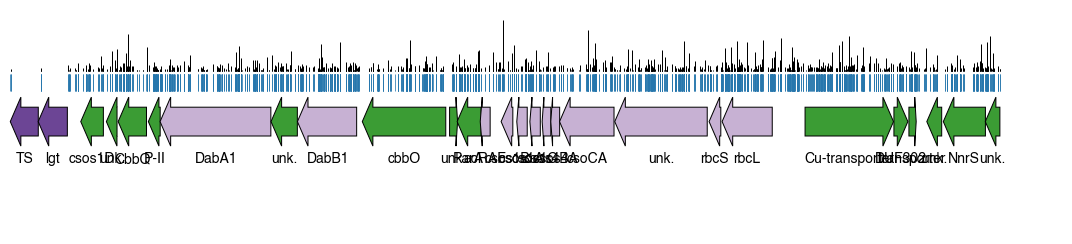

In [6]:
# Making Panel B

fig,ax = plt.subplots(figsize=(15, 3.5), frameon=False)

plt.ylim(0, 0.4)
region = (983594-14000,986794+11000)
y = 0.2

insert_color = qual_palette[1]

# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

region_start, region_end = region
region_length = region_end - region_start

genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                  (essentiality_df.end <= region_end)]
insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                 (total_pool_df.pos <= region_end)]

for gene_idx in genes_in_region.index:
    gene = genes_in_region.loc[gene_idx]
    gene_name = short_names[gene.locusId]
#     print(gene_name)
    gene_length = gene.length_rep1
    gene_essentiality = essentiality_df.loc[gene_idx].essentiality
    length = gene_length * len_per_bp
    head_length = length*head_scale
    if length > 0.03:
        head_length = 0.03
    c = essentiality_colors[gene_essentiality]
    
    is_hcr = (small_log_df[small_log_df.locusId == gene.locusId].hcr).any()
    if is_hcr:
        c = essentiality_colors['hcr']

    gene_start = gene.begin
    gene_end = gene.end
    gene_strand = gene.strand

    if gene_strand == '+':
        start = (gene_start - region_start)*len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
        ax.add_artist(genePic)
        plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
    else:
        start = (gene_end - region_start) * len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, -length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth,
            head_length=head_length, fill=True,facecolor=c)
        ax.add_artist(genePic)
        plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)

poses = (insert_in_region.pos - region_start) * len_per_bp
n_positions = len(poses)

bottoms = [y+height+headwidth/2 + 0.045]*n_positions
tops = bottoms + (height*insert_in_region.n_total)
plt.vlines(poses, bottoms, tops, colors='k')

bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
tops = bottoms + 0.03
plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)

# print(dict(zip(genes_in_region.locusId, genes_in_region.desc)))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

plt.savefig('fig2/fig2C_sub1.eps', format='eps', bbox_inches='tight')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


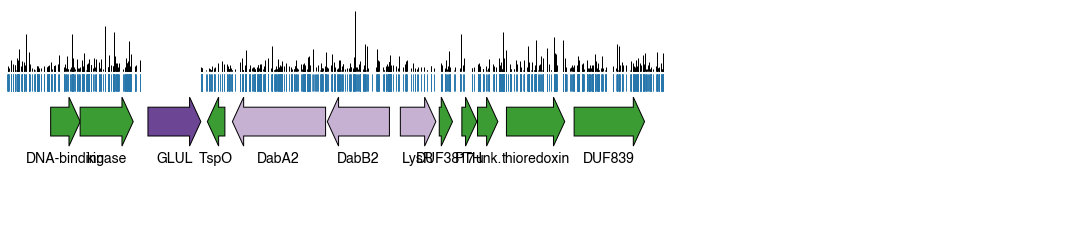

In [7]:
# Making Panel B

fig,ax = plt.subplots(figsize=(15, 3.5), frameon=False)

plt.ylim(0, 0.4)
region = (216936-6000,219419+9000)
y = 0.2

insert_color = qual_palette[1]

# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

region_start, region_end = region
region_length = region_end - region_start

genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                  (essentiality_df.end <= region_end)]
insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                 (total_pool_df.pos <= region_end)]

for gene_idx in genes_in_region.index:
    gene = genes_in_region.loc[gene_idx]
    gene_name = short_names[gene.locusId]
    gene_length = gene.length_rep1
    gene_essentiality = essentiality_df.loc[gene_idx].essentiality
    length = gene_length * len_per_bp
    head_length = length*head_scale
    if length > 0.03:
        head_length = 0.03
    c = essentiality_colors[gene_essentiality]
    
    is_hcr = (small_log_df[small_log_df.locusId == gene.locusId].hcr).any()
    if is_hcr:
        c = essentiality_colors['hcr']

    gene_start = gene.begin
    gene_end = gene.end
    gene_strand = gene.strand

    if gene_strand == '+':
        start = (gene_start - region_start)*len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
        ax.add_artist(genePic)
        plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
    else:
        start = (gene_end - region_start) * len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, -length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth,
            head_length=head_length, fill=True,facecolor=c)
        ax.add_artist(genePic)
        plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)

poses = (insert_in_region.pos - region_start) * len_per_bp
n_positions = len(poses)

bottoms = [y+height+headwidth/2 + 0.045]*n_positions
tops = bottoms + (height*insert_in_region.n_total)
plt.vlines(poses, bottoms, tops, colors='k')

bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
tops = bottoms + 0.03
plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)

# print(dict(zip(genes_in_region.locusId, genes_in_region.desc)))



ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

length_longer_axis = ((986794+11000)- (983594-14000))*len_per_bp

plt.xlim(0,length_longer_axis)
plt.tight_layout()

plt.savefig('fig2/fig1C_sub2.eps', format='eps', bbox_inches='tight')
plt.show()

In [8]:
essentiality_df[essentiality_df.locusId.isin(['HNEAP_RS05490','HNEAP_RS07320'])]

,Unnamed: 0,locusId,sysName,type,scaffoldId,begin,end,strand,name,desc,...,nTA,pval_raw_rep1,pval_corr_rep1,length_rep1,n_inserts_rep1,pval_raw_rep2,pval_corr_rep2,length_rep2,n_inserts_rep2,essentiality
1089,1089,HNEAP_RS05490,HNEAP_RS05490,1,NC_013422.1,1179635,1180537,+,NaN,LysR family transcriptional regulator,...,31,0.074057,178.329436,902.0,27.0,0.050014,120.434438,902.0,25.0,nonessential
1460,1460,HNEAP_RS07320,HNEAP_RS07320,1,NC_013422.1,1575176,1575778,+,NaN,hypothetical protein,...,17,0.317394,764.284556,602.0,21.0,0.293216,706.064741,602.0,20.0,nonessential


{'HNEAP_RS05480': 'sensor domain-containing diguanylate cyclase', 'HNEAP_RS05495': 'VWA domain-containing protein', 'HNEAP_RS05485': 'tRNA-Met', 'HNEAP_RS12520': 'hypothetical protein', 'HNEAP_RS05490': 'LysR family transcriptional regulator'}


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


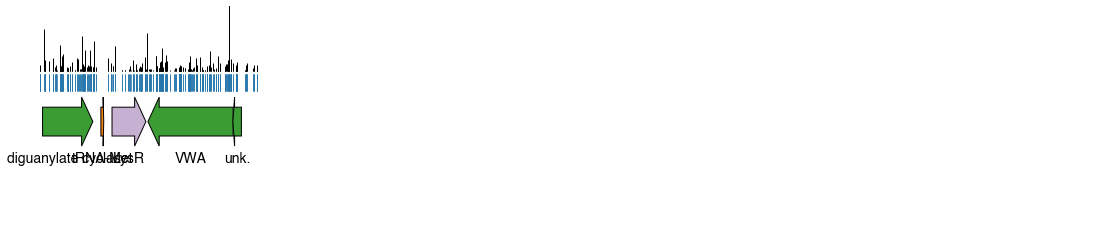

In [9]:
# Making Panel B

fig,ax = plt.subplots(figsize=(15, 3.5), frameon=False)

plt.ylim(0, 0.4)
region = (1179635-2000,1180537+3000)
y = 0.2

insert_color = qual_palette[1]

# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

region_start, region_end = region
region_length = region_end - region_start

genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                  (essentiality_df.end <= region_end)]
insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                 (total_pool_df.pos <= region_end)]

for gene_idx in genes_in_region.index:
    gene = genes_in_region.loc[gene_idx]
#     gene_name = short_names[gene.locusId]
    gene_name = short_names.get(gene.locusId, 'Unk.')
    gene_length = gene.length_rep1
    gene_essentiality = essentiality_df.loc[gene_idx].essentiality
    length = gene_length * len_per_bp
    head_length = length*head_scale
    if length > 0.03:
        head_length = 0.03
    c = essentiality_colors[gene_essentiality]
    
    is_hcr = (small_log_df[small_log_df.locusId == gene.locusId].hcr).any()
    if is_hcr:
        c = essentiality_colors['hcr']

    gene_start = gene.begin
    gene_end = gene.end
    gene_strand = gene.strand

    if gene_strand == '+':
        start = (gene_start - region_start)*len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
        ax.add_artist(genePic)
        plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
    else:
        start = (gene_end - region_start) * len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, -length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth,
            head_length=head_length, fill=True,facecolor=c)
        ax.add_artist(genePic)
        plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)

poses = (insert_in_region.pos - region_start) * len_per_bp
n_positions = len(poses)

bottoms = [y+height+headwidth/2 + 0.045]*n_positions
tops = bottoms + (height*insert_in_region.n_total)
plt.vlines(poses, bottoms, tops, colors='k')

bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
tops = bottoms + 0.03
plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)

print(dict(zip(genes_in_region.locusId, genes_in_region.desc)))



ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

length_longer_axis = ((986794+11000)- (983594-14000))*len_per_bp

plt.xlim(0,length_longer_axis)
plt.tight_layout()

plt.savefig('fig2/fig1C_sub3.eps', format='eps', bbox_inches='tight')
plt.show()

{'HNEAP_RS07320': 'hypothetical protein', 'HNEAP_RS07315': 'hypothetical protein', 'HNEAP_RS07310': 'hypothetical protein', 'HNEAP_RS07325': 'diguanylate phosphodiesterase'}


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


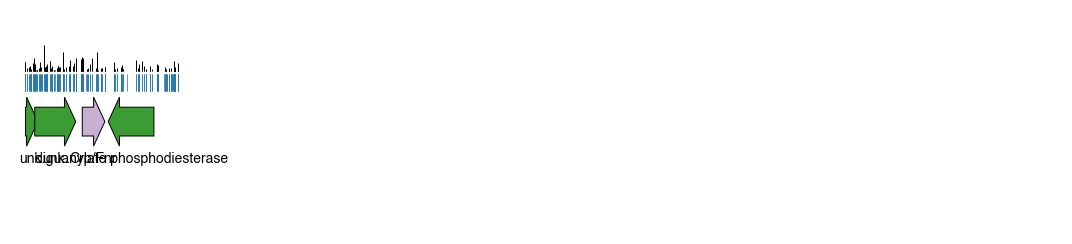

In [10]:
# Making Panel B

fig,ax = plt.subplots(figsize=(15, 3.5), frameon=False)

plt.ylim(0, 0.4)
region = (1575176 -2000,1575778 +2000)
y = 0.2

insert_color = qual_palette[1]

# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

region_start, region_end = region
region_length = region_end - region_start

genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                  (essentiality_df.end <= region_end)]
insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                 (total_pool_df.pos <= region_end)]

for gene_idx in genes_in_region.index:
    gene = genes_in_region.loc[gene_idx]
#     gene_name = short_names[gene.locusId]
    gene_name = short_names.get(gene.locusId, 'Unk.')
    gene_length = gene.length_rep1
    gene_essentiality = essentiality_df.loc[gene_idx].essentiality
    length = gene_length * len_per_bp
    head_length = length*head_scale
    if length > 0.03:
        head_length = 0.03
    c = essentiality_colors[gene_essentiality]
    
    is_hcr = (small_log_df[small_log_df.locusId == gene.locusId].hcr).any()
    if is_hcr:
        c = essentiality_colors['hcr']

    gene_start = gene.begin
    gene_end = gene.end
    gene_strand = gene.strand

    if gene_strand == '+':
        start = (gene_start - region_start)*len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
        ax.add_artist(genePic)
        plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
    else:
        start = (gene_end - region_start) * len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, -length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth,
            head_length=head_length, fill=True,facecolor=c)
        ax.add_artist(genePic)
        plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)

poses = (insert_in_region.pos - region_start) * len_per_bp
n_positions = len(poses)

bottoms = [y+height+headwidth/2 + 0.045]*n_positions
tops = bottoms + (height*insert_in_region.n_total)
plt.vlines(poses, bottoms, tops, colors='k')

bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
tops = bottoms + 0.03
plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)

print(dict(zip(genes_in_region.locusId, genes_in_region.desc)))



ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

length_longer_axis = ((986794+11000)- (983594-14000))*len_per_bp

plt.xlim(0,length_longer_axis)
plt.tight_layout()

plt.savefig('fig2/fig1C_sub4.eps', format='eps', bbox_inches='tight')
plt.show()